In [2]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import os
import urllib

In [3]:
# download the data from Zenodo
# real data
DATA_URL = 'https://zenodo.org/record/3911859/files/realdata_binned_processed13.csv?download=1'
# synthetic data
# DATA_URL = 'https://zenodo.org/record/3911859/files/synthdata_binned_processed13.csv?download=1'

urllib.request.urlretrieve(DATA_URL, "dataset.csv")

('dataset.csv', <http.client.HTTPMessage at 0x13f913fd0>)

In [4]:
# data set is with 13 bins
SIZE=13

# read in the data from file
df = pd.read_csv('dataset.csv')

In [3]:
df

,Unnamed: 0,exp_id,firstindex,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,bin8,bin9,bin10,bin11,bin12,ispeak,sum,mean,max,min
0,1335,1,1335,11,15,14,17,14,26,26,...,19,19,12,16,22,1,232,17.846154,26,11
1,4007,1,4007,230,233,262,253,265,276,303,...,309,296,260,225,246,1,3453,265.615385,309,225
2,4009,1,4009,262,253,265,276,303,295,309,...,260,225,246,228,193,1,3411,262.384615,309,193
3,6622,1,6622,148,154,175,210,213,234,273,...,240,224,186,172,141,1,2583,198.692308,273,141
4,6624,1,6624,175,210,213,234,273,213,240,...,186,172,141,127,114,1,2522,194.000000,273,114
5,11469,1,11469,2,3,5,2,4,5,6,...,4,2,2,2,3,1,45,3.461538,6,2
6,13968,1,13968,61,47,50,54,52,60,76,...,45,59,61,60,46,1,738,56.769231,76,45
7,13972,1,13972,52,60,76,67,45,59,61,...,46,52,26,37,43,1,684,52.615385,76,26
8,17719,1,17719,29,33,33,33,36,47,56,...,42,40,31,29,37,1,494,38.000000,56,29
9,20391,1,20391,639,633,636,673,625,678,750,...,726,671,639,579,554,1,8505,654.230769,750,554


In [4]:
# remove Nan
df = df.dropna()

Counter(df['ispeak'])

Counter({1: 294510, 0: 294510})

In [167]:
X = df[[f"bin{i}" for i in range(SIZE)]]

In [168]:
X = pd.concat([X[:nentries], X[-nentries:]])
X_trans = RobustScaler().fit_transform(X)
X.shape, X_trans.shape

((2000, 13), (2000, 13))

In [169]:
np.log(X + 1)/(13.1)

,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12
0,0.189688,0.211648,0.206721,0.220639,0.206721,0.251591,0.251591,0.235957,0.228682,0.228682,0.195798,0.216276,0.239351
1,0.415452,0.416437,0.425355,0.422697,0.426221,0.429314,0.436414,0.434379,0.437906,0.434636,0.424773,0.413781,0.420564
2,0.425355,0.422697,0.426221,0.429314,0.436414,0.434379,0.437906,0.434636,0.424773,0.413781,0.420564,0.414788,0.402127
3,0.381981,0.384994,0.394693,0.408539,0.409616,0.416762,0.428483,0.409616,0.418687,0.413443,0.399321,0.393381,0.378307
4,0.394693,0.408539,0.409616,0.416762,0.428483,0.409616,0.418687,0.413443,0.399321,0.393381,0.378307,0.370384,0.362209
5,0.083864,0.105824,0.136776,0.083864,0.122858,0.136776,0.148543,0.136776,0.122858,0.083864,0.083864,0.083864,0.105824
6,0.315048,0.295512,0.300139,0.305903,0.303076,0.313807,0.331588,0.322100,0.292263,0.312545,0.315048,0.313807,0.293904
7,0.303076,0.313807,0.331588,0.322100,0.292263,0.312545,0.315048,0.313807,0.293904,0.303076,0.251591,0.277678,0.288869
8,0.259633,0.269188,0.269188,0.269188,0.275643,0.295512,0.308630,0.297086,0.287115,0.283479,0.264560,0.259633,0.277678
9,0.493242,0.492523,0.492883,0.497193,0.491553,0.497757,0.505451,0.500409,0.502971,0.496966,0.493242,0.485727,0.482364


In [170]:
# log normalisation
class LogNormalizer():
    def __init__(self, nmin=0.0, nmax=13):
        self.nmin = nmin
        self.nmax = nmax
    
    def fit_transform(self, X, *args, **kwargs):
        return (np.log(X.iloc[:, :].values + 1) - self.nmin)/(self.nmax - self.nmin)

In [171]:
nentries = 1000

X = pd.concat([X[:nentries], X[-nentries:]])
# X_trans = RobustScaler().fit_transform(X)
# X_trans = Normalizer().fit_transform(X)
X_trans = LogNormalizer().fit_transform(X)

tsne = TSNE(n_components=2, random_state=0, perplexity=80, n_iter=10000)
data = tsne.fit_transform(X_trans)
x = data[:,0]
y = data[:,1]
labels = pd.concat([df['ispeak'][:nentries], df['ispeak'][-nentries:]]).values

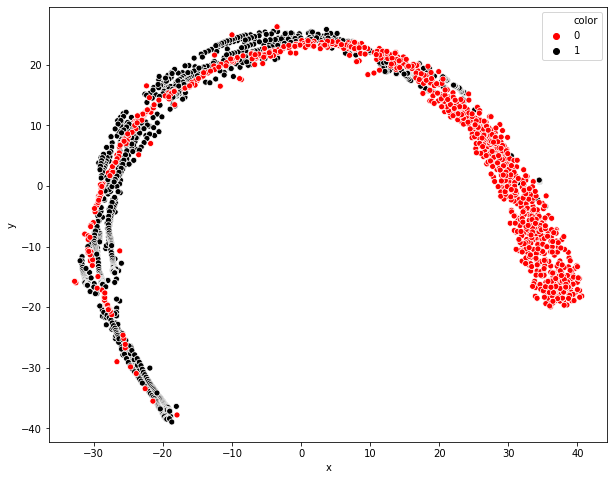

In [172]:
fig, ax = plt.subplots(figsize=(10,8))
plot_df = pd.DataFrame(dict(x=x, y=y, color=labels))
sns.scatterplot('x', 'y', data=plot_df, hue='color', palette=['red','black'])

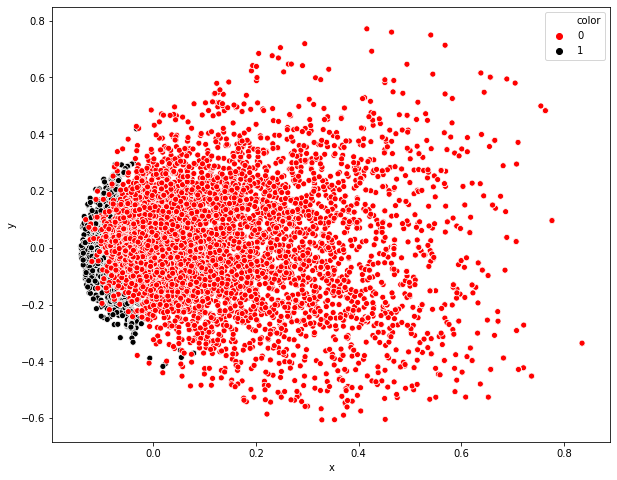

In [173]:
nentries = 10000

X = df[[f"bin{i}" for i in range(SIZE)]]
X = pd.concat([X[:nentries], X[-nentries:]])
# X_trans = StandardScaler().fit_transform(X)
# X_trans = MinMaxScaler().fit_transform(X)
X_trans = Normalizer().fit_transform(X)
# X_trans = LogNormalizer().fit_transform(X)

pca = PCA(n_components=2, random_state=0)
data2 = pca.fit_transform(X_trans)
x2 = data2[:,0]
y2 = data2[:,1]
labels = pd.concat([df['ispeak'][:nentries], df['ispeak'][-nentries:]]).values
fig, ax = plt.subplots(figsize=(10,8))
plot_df2 = pd.DataFrame(dict(x=x2, y=y2, color=labels))
sns.scatterplot('x', 'y', data=plot_df2, hue='color', palette=['red','black'])

In [174]:
X = df[[f"bin{i}" for i in range(SIZE)]].to_numpy()
y = df['ispeak'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

In [175]:
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [176]:
gbc.score(X_test, y_test)

0.8850123934671149

In [177]:
y_test.shape

(58902,)

In [178]:
y_pred = gbc.predict_proba(X_test)
y_pred, y_pred.ravel()[1::2]

(array([[0.13270096, 0.86729904],
        [0.7735318 , 0.2264682 ],
        [0.9706267 , 0.0293733 ],
        ...,
        [0.09494681, 0.90505319],
        [0.30959121, 0.69040879],
        [0.91712744, 0.08287256]]),
 array([0.86729904, 0.2264682 , 0.0293733 , ..., 0.90505319, 0.69040879,
        0.08287256]))

In [179]:
y_pred = gbc.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0])

Text(0, 0.5, 'Truth')

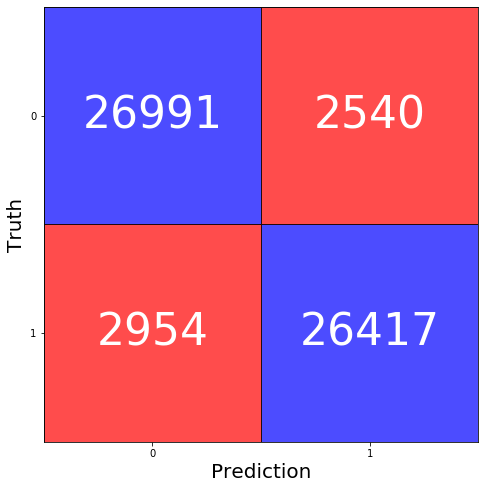

In [180]:
from sklearn.metrics import confusion_matrix
import matplotlib.patches as patches

y_pred = gbc.predict(X_test)
mat = confusion_matrix(y_test, y_pred)

threshold = 0.6
y_prob = gbc.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= threshold).astype('int')
mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,8))

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xlabel("Prediction", fontsize=20)
ax.set_ylabel("Truth", fontsize=20)

im = ax.imshow(mat, cmap='Blues', alpha=0.0)

ax.add_patch(patches.Rectangle((-0.5, -0.5), 1, 1, linewidth=1, edgecolor='k', facecolor='blue', alpha=0.7))
ax.add_patch(patches.Rectangle((0.5, 0.5), 1, 1, linewidth=1, edgecolor='k', facecolor='blue', alpha=0.7))
ax.add_patch(patches.Rectangle((-0.5, 0.5), 1, 1, linewidth=1, edgecolor='k', facecolor='red', alpha=0.7))
ax.add_patch(patches.Rectangle((0.5, -0.5), 1, 1, linewidth=1, edgecolor='k', facecolor='red', alpha=0.7))

tn, fp, fn, tp = mat.ravel()

fontsize = 44
fontcolor = 'w'
tn_text = ax.text(0, 0, tn, ha="center", va="center", color=fontcolor, fontsize=fontsize)
fp_text = ax.text(1, 0, fp, ha="center", va="center", color=fontcolor, fontsize=fontsize) 
fn_text = ax.text(0, 1, fn, ha="center", va="center", color=fontcolor, fontsize=fontsize) 
tp_text = ax.text(1, 1, tp, ha="center", va="center", color=fontcolor, fontsize=fontsize) 

plt.xlabel("Prediction")
plt.ylabel("Truth")

In [181]:
from sklearn.metrics import roc_curve, auc, classification_report

y_pred_prob = gbc.predict_proba(X_test).ravel()[1::2]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_model = auc(fpr, tpr)
auc_model

0.9604519937505958

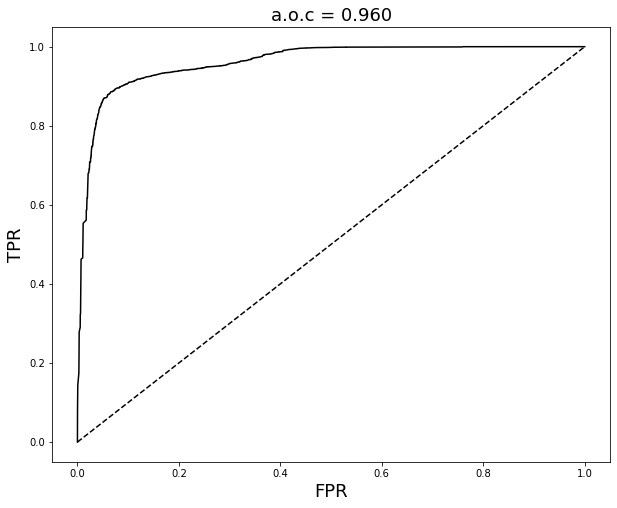

In [182]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR', fontsize=18)
plt.ylabel('TPR', fontsize=18)
plt.title(f'a.o.c = {auc_model:.3f}', fontsize=18)
plt.plot(fpr, tpr, 'k')